In [5]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import pandas as pd 

dataset = pd.read_csv("../data/football_data.txt",index_col=False,sep="\t" , header=0)
print(dataset[:10])

average_goals_per_match  won_competition
0                 2.422870                1
1                 2.824478                1
2                 0.571688                0
3                 1.055028                0
4                 0.394192                0
5                 0.754099                0
6                 0.962960                0
7                 1.994728                0
8                 0.456755                0
9                 0.525435                0


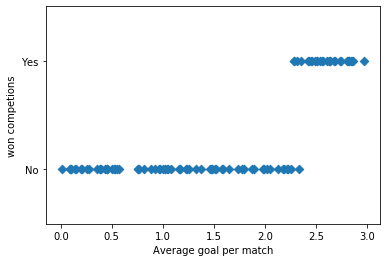

In [14]:
#plot 
train_X=dataset['average_goals_per_match']
train_Y = dataset['won_competition']
plt.scatter(train_X,train_Y,marker='D')
plt.yticks([0,1],['No','Yes'])
plt.ylim([-0.5,1.5])
plt.xlabel('Average goal per match')
plt.ylabel('won competions')
plt.show()

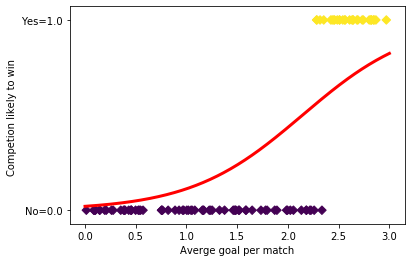

In [56]:
#train the model with logistic regression
import numpy as np 
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(train_X[:,np.newaxis],train_Y)

def sigmoid(x):
    return 1/(1+np.exp(-x))

X_test = np.linspace(0,3,300)
#print(X_test)
loss = sigmoid(X_test * model.coef_ + model.intercept_).ravel()

#graph with error too
plt.scatter(train_X,train_Y,c = train_Y,marker='D')
plt.plot(X_test,loss,color = 'red' , linewidth = 3)
plt.yticks([0,1],['No=0.0','Yes=1.0' ])
plt.ylabel("Competion likely to win ")
plt.xlabel("Averge goal per match")
plt.show()

In [57]:
#test with 0 to 3
goals = 2.3  
x_2dot5 = sigmoid(goals * model.coef_ + model.intercept_).ravel()

wining_prob = model.predict_proba([[goals]])[0][1]

print ("sigmoid value = {0} and probabilty = {1}" . format(x_2dot5,wining_prob))

sigmoid value = [0.56994289] and probabilty = 0.5699428936279893


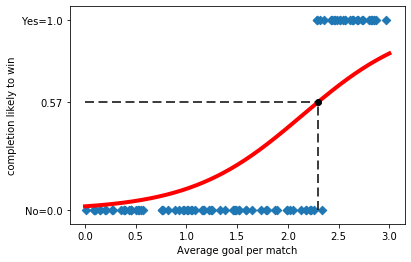

In [58]:
plt.scatter(train_X,train_Y,marker='D')
plt.yticks([0,wining_prob,1],['No=0.0',round(wining_prob,3),'Yes=1.0'])
plt.plot(X_test,loss,color='red',linewidth=4)
plt.plot(goals,wining_prob,'ko')
plt.plot(np.linspace(0,goals,2), np.full([2],wining_prob),dashes=[6,3],color='black')
plt.plot(np.full([2],goals), np.linspace(0,wining_prob,2), dashes=[6,3], color='black')
plt.ylabel('completion likely to win')
plt.xlabel('Average goal per match')
plt.show()

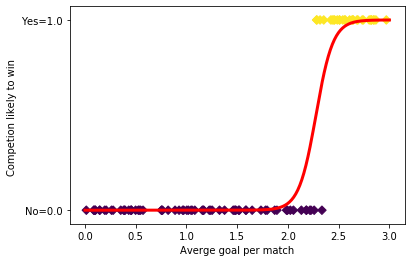

In [60]:
#comparing with stiffer sigmoid function
model2 = linear_model.LogisticRegression(C=200)
model2.fit(train_X[:,np.newaxis],train_Y)

#graph with error too
loss = sigmoid(X_test * model2.coef_ + model2.intercept_).ravel()
plt.scatter(train_X,train_Y,c = train_Y,marker='D')
plt.plot(X_test,loss,color = 'red' , linewidth = 3)
plt.yticks([0,1],['No=0.0','Yes=1.0' ])
plt.ylabel("Competion likely to win ")
plt.xlabel("Averge goal per match")
plt.show()

In [ ]:
#till now we have optimized with cost function
#optimization using gradient decent
